In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
BTC = yf.download('BTC-USD', start='2022-12-23', end='2022-12-24',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-23 00:00:00+00:00,16829.644531,16829.644531,16829.644531,16829.644531,16829.644531,0
2022-12-23 00:01:00+00:00,16832.597656,16832.597656,16832.597656,16832.597656,16832.597656,0
2022-12-23 00:02:00+00:00,16832.523438,16832.523438,16832.523438,16832.523438,16832.523438,766976
2022-12-23 00:03:00+00:00,16834.488281,16834.488281,16834.488281,16834.488281,16834.488281,0
2022-12-23 00:04:00+00:00,16825.230469,16825.230469,16825.230469,16825.230469,16825.230469,0
...,...,...,...,...,...,...
2022-12-23 23:55:00+00:00,16796.691406,16796.691406,16796.691406,16796.691406,16796.691406,7209984
2022-12-23 23:56:00+00:00,16797.160156,16797.160156,16797.160156,16797.160156,16797.160156,284672
2022-12-23 23:57:00+00:00,16796.890625,16796.890625,16796.890625,16796.890625,16796.890625,0


In [4]:
ETH = yf.download('ETH-USD', start='2022-12-23', end='2022-12-24',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-23 00:00:00+00:00,1218.079346,1218.079346,1218.079346,1218.079346,1218.079346,0
2022-12-23 00:01:00+00:00,1218.119385,1218.119385,1218.119385,1218.119385,1218.119385,0
2022-12-23 00:02:00+00:00,1218.201294,1218.201294,1218.201294,1218.201294,1218.201294,802304
2022-12-23 00:03:00+00:00,1218.357910,1218.357910,1218.357910,1218.357910,1218.357910,1193984
2022-12-23 00:04:00+00:00,1217.840820,1217.840820,1217.840820,1217.840820,1217.840820,0
...,...,...,...,...,...,...
2022-12-23 23:55:00+00:00,1220.201172,1220.201172,1220.201172,1220.201172,1220.201172,3086848
2022-12-23 23:56:00+00:00,1220.282959,1220.282959,1220.282959,1220.282959,1220.282959,0
2022-12-23 23:57:00+00:00,1220.159180,1220.159180,1220.159180,1220.159180,1220.159180,0


In [6]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [7]:
S1_0

16829.64453125

In [8]:
S2_0

1218.079345703125

In [9]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1440
mu_2 = lr2.mean() * 1440
sigma_1 = lr1.std() * np.sqrt(1440)
sigma_2 = lr2.std() * np.sqrt(1440)
rho = lr1.corr(lr2)
z_0 = 0.00  
gamma = 0.5
delta = 1 
T = 1
M = len(BTC)

In [10]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [11]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [12]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Price')

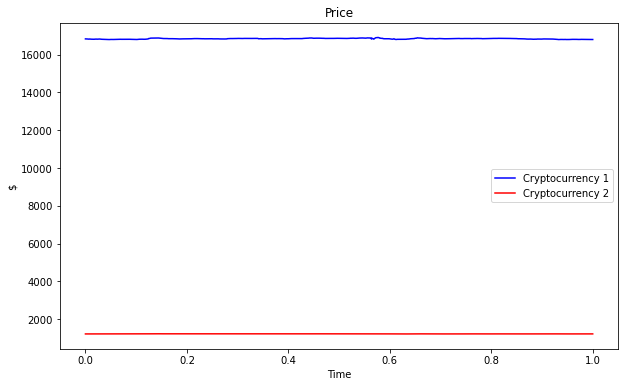

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Cryptocurrency 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Cryptocurrency 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Price')

Text(0.5, 1.0, 'z')

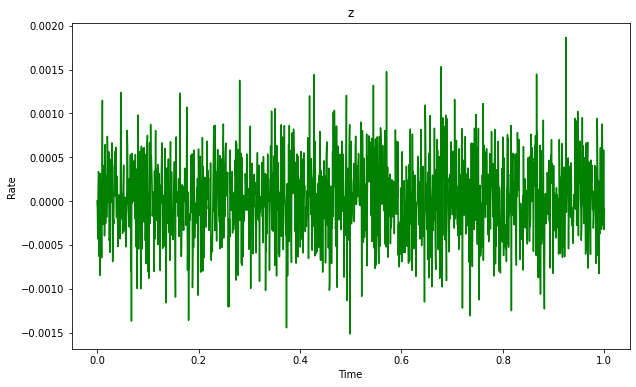

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [15]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

# Optimal Weights

Text(0.5, 1.0, 'Weights')

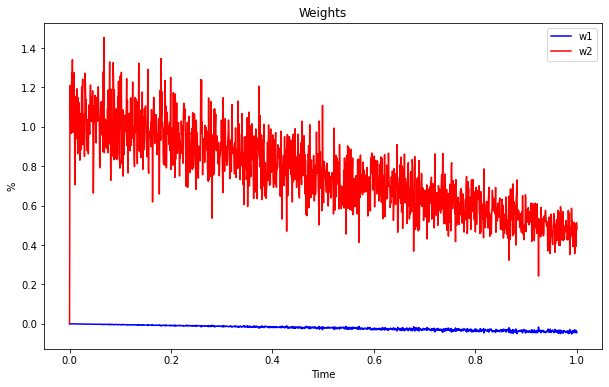

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

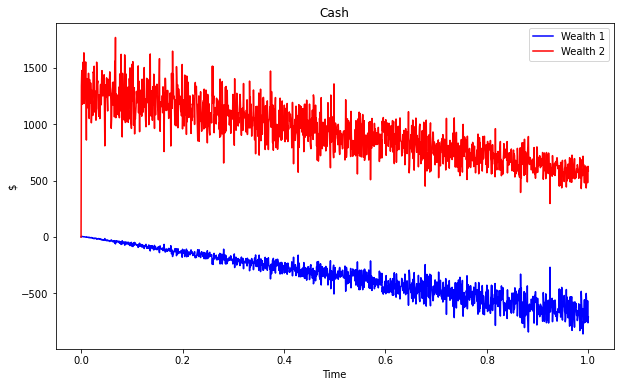

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [18]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

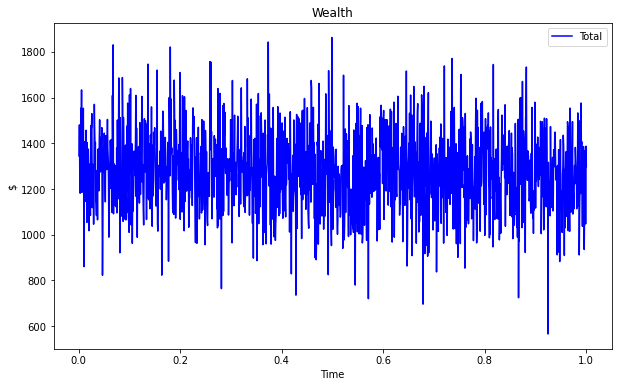

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [20]:
Wealth[1]

array([1344.51667646])

In [21]:
Wealth[-1]

array([1298.49484295])

In [22]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.03422928])

# Simulation of 2 Assets

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [24]:
BTC_USD = yf.download('BTC-USD', start='2022-12-27', end='2022-12-28',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [25]:
BTC_USD

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-27 00:00:00+00:00,16919.291016,16919.291016,16919.291016,16919.291016,16919.291016,0
2022-12-27 00:01:00+00:00,16917.777344,16917.777344,16917.777344,16917.777344,16917.777344,9994240
2022-12-27 00:02:00+00:00,16932.855469,16932.855469,16932.855469,16932.855469,16932.855469,35813376
2022-12-27 00:03:00+00:00,16932.744141,16932.744141,16932.744141,16932.744141,16932.744141,16715776
2022-12-27 00:04:00+00:00,16952.355469,16952.355469,16952.355469,16952.355469,16952.355469,53012480
...,...,...,...,...,...,...
2022-12-27 23:55:00+00:00,16716.603516,16716.603516,16716.603516,16716.603516,16716.603516,0
2022-12-27 23:56:00+00:00,16716.810547,16716.810547,16716.810547,16716.810547,16716.810547,0
2022-12-27 23:57:00+00:00,16716.541016,16716.541016,16716.541016,16716.541016,16716.541016,0


In [26]:
ETH_USD = yf.download('ETH-USD', start='2022-12-27', end='2022-12-28',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [27]:
ETH_USD

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-27 00:00:00+00:00,1226.987061,1226.987061,1226.987061,1226.987061,1226.987061,0
2022-12-27 00:01:00+00:00,1227.436890,1227.436890,1227.436890,1227.436890,1227.436890,0
2022-12-27 00:02:00+00:00,1228.570679,1228.570679,1228.570679,1228.570679,1228.570679,14410752
2022-12-27 00:03:00+00:00,1228.840698,1228.840698,1228.840698,1228.840698,1228.840698,6625536
2022-12-27 00:04:00+00:00,1230.418091,1230.418091,1230.418091,1230.418091,1230.418091,30469888
...,...,...,...,...,...,...
2022-12-27 23:55:00+00:00,1212.697632,1212.697632,1212.697632,1212.697632,1212.697632,0
2022-12-27 23:56:00+00:00,1212.857300,1212.857300,1212.857300,1212.857300,1212.857300,0
2022-12-27 23:57:00+00:00,1212.830566,1212.830566,1212.830566,1212.830566,1212.830566,0


In [28]:
S1_0 = BTC_USD['Open'][0]
S2_0 = ETH_USD['Open'][0]

In [29]:
S1_0

16919.291015625

In [30]:
S2_0

1226.987060546875

In [31]:
mu_1 = 0.01
mu_2 = 0.02
sigma_1 = 0.05
sigma_2 = 0.1
z_0 = 0.01
beta = 0.8
gamma = 0.8
delta = 0.9
phi = 0.01
rho = -0.8
T = 1
M = 390

In [32]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [33]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

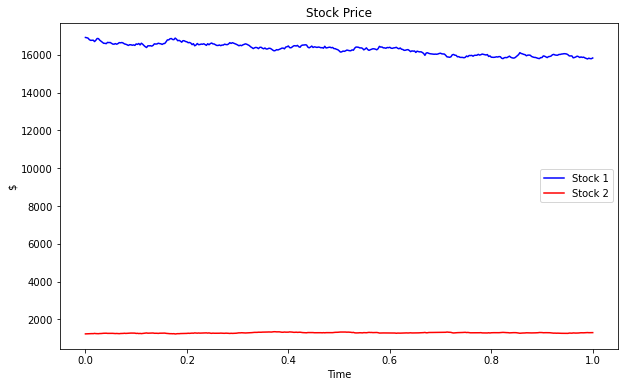

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'Alpha')

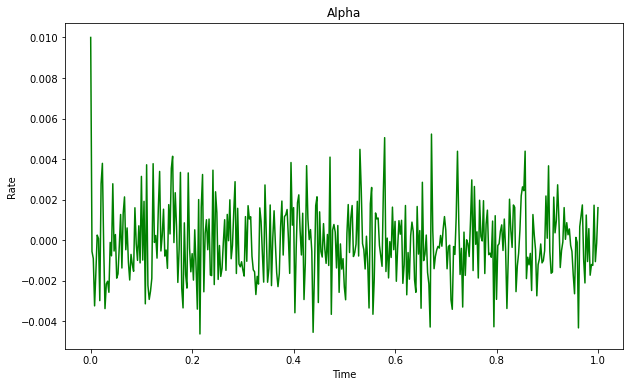

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Alpha')

In [36]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

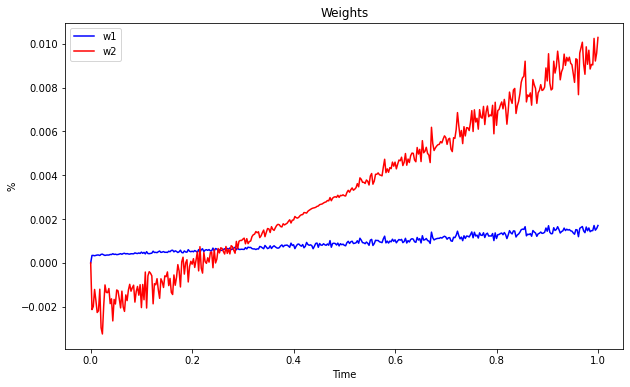

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

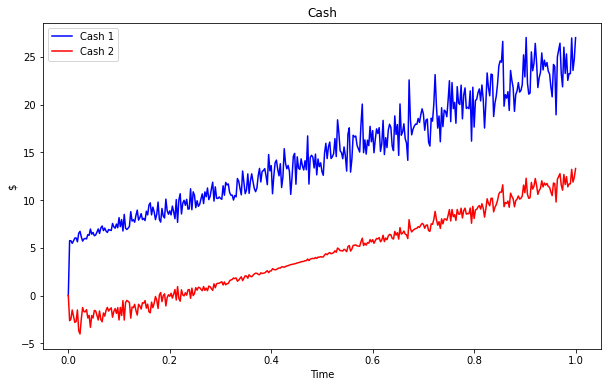

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [39]:
Pi_1.mean()

0.0009111340778179533

In [40]:
Pi_2.mean()

0.0033999135651335425

Text(0.5, 1.0, 'Comparison')

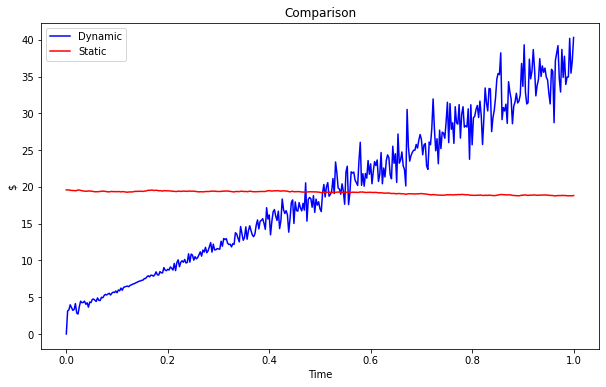

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')